In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import batch_iter, load
from model import *

base = Path('../aclImdb')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
testdf = pd.read_csv('test.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Data
df = pd.read_csv('train.csv')
lang = load_model()

# Model
hidden_size = 20
embed_size = 300
model = SentModel(embed_size, hidden_size, lang, device)
model = model.to(device)

lr = 1e-3
clip_grad = 5.
optimizer = torch.optim.Adam(model.parameters())
loss_fcn = nn.BCELoss()

# Structure Test Data 

In [6]:
from init import extract_helper

In [7]:
neg_exs, neg_labels, neg_ratings = extract_helper('test/neg/', 0)
pos_exs, pos_labels, pos_ratings = extract_helper('test/pos/', 1)

In [54]:
test_df = pd.DataFrame(data={'path': neg_exs + pos_exs,
                        'target': neg_labels + pos_labels,
                        'review_rating': neg_ratings + pos_ratings})
test_df = test_df.sample(frac=1.)
test_df.to_csv('test.csv', index=False)

# Predictions + Accuracy 

In [1]:
from train import batch_iter

In [2]:
test_df = pd.read_csv('test.csv')

NameError: name 'pd' is not defined

In [56]:
threshold = torch.tensor([0.5])
n_examples = 0
n_correct = 0
for sents, targets in batch_iter(lang, test_df[:2000], 10, shuffle=True):
    preds = model(sents)
    preds = (preds >= threshold).float()
    n_correct += torch.eq(preds, targets).sum().float()
    n_examples += len(targets)

(tensor(8.),
 10,
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 0., 1., 0., 0., 0., 1., 0., 0.]))

In [5]:
model(ex)

NameError: name 'ex' is not defined

In [6]:
test = torch.tensor([0.5, 0.2, 0.2])
test

tensor([0.5000, 0.2000, 0.2000])

In [7]:
t = torch.tensor([0.5])
t

tensor([0.5000])

In [8]:
preds_rounded = (test >= t).float()
preds_rounded

tensor([1., 0., 0.])

In [9]:
true = torch.tensor([1, 0, 1]).float()
true

tensor([1., 0., 1.])

In [14]:
(1 - torch.abs(preds_rounded - true)).sum() / len(true)

tensor(0.6667)

In [16]:
torch.eq(preds_rounded, true).sum().float() / len(true) 

tensor(0.6667)

In [40]:
len(true)

3

In [ ]:
def validate():
    threshold = torch.tensor([0.5])
    n_examples = 0
    n_correct = 0
    for sents, targets in batch_iter(lang, test_df[:2000], 10, shuffle=True):
        preds = model(sents)
        preds = (preds >= threshold).float()
        n_correct += (1 - torch.abs(preds - targets)).sum()
        n_examples += len(targets)
    
    return n_correct / n_examples

In [17]:
loss = accuracy = val_loss = val_accuracy = []

In [18]:
loss.append(1)

In [19]:
loss, accuracy, val_loss, val_accuracy 

([1], [1], [1], [1])

In [20]:
loss = accuracy = val_loss = val_accuracy = 0

In [21]:
loss += 1

In [22]:
loss, accuracy, val_loss, val_accuracy 

(1, 0, 0, 0)

# Metrics

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
model_save_path = 'model.bin'

Total Time: 4.1538 
Train Time: 3.587


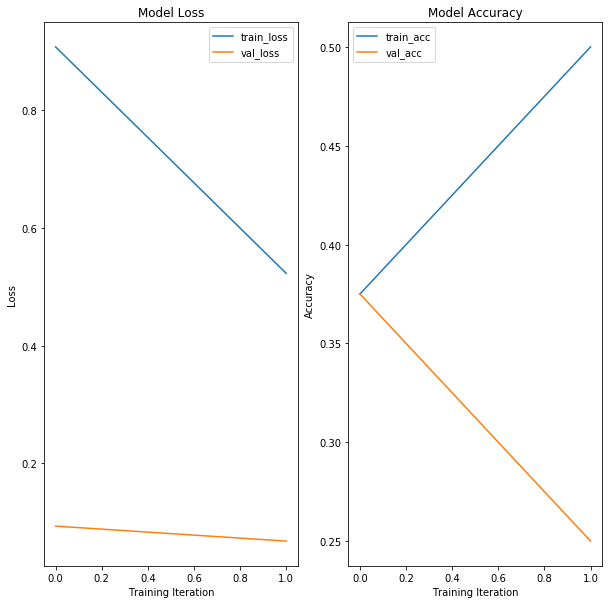

In [60]:
metrics = torch.load('metric_saves/' + model_save_path + '.metrics')

def plot_metrics(metrics):
    print("Total Time: {} \nTrain Time: {}".format(metrics['total_time'], metrics['train_time']))
    metrics = pd.DataFrame(metrics)
    metrics['itr'] = list(range(len(metrics['train_loss'])))
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    
    # plot loss 
    ax1.plot('itr', 'train_loss', data=metrics)
    ax1.plot('itr', 'val_loss', data=metrics)
    ax1.legend()
    ax1.set_xlabel('Training Iteration')
    ax1.set_ylabel('Loss')
    ax1.set_title('Model Loss')
    
    # plot accuracy
    ax2.plot('itr', 'train_acc', data=metrics)
    ax2.plot('itr', 'val_acc', data=metrics)
    ax2.legend()
    ax2.set_xlabel('Training Iteration')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Model Accuracy')
    
    plt.plot()

plot_metrics(metrics)

# Testing Types of Tokenization

In [1]:
from bert.tokenization import WordpieceTokenizer, FullTokenizer
import os

In [50]:
vocab_file = 'vocab.txt'
with open(vocab_file, 'r') as f:
    vocab_tokens = f.read().split('\n')

vocab = {}
for (i, token) in enumerate(vocab_tokens):
    vocab[token] = i

In [56]:
tokenizer = FullTokenizer(vocab_file, do_lower_case=True)

In [59]:
tokenizer.tokenize(' '.join(["John", "Johanson", "'s",  "house"]))

['john', 'johan', '##son', "'", 's', 'house']

In [60]:
tokenizer.tokenize("unwanted running")

['unwanted', 'running']

Tokenizer 2 below...

In [17]:
vocab_tokens = [
    "[UNK]", "[CLS]", "[SEP]", "want", "##want", "##ed", "wa", "un", "runn", "##ing"
]

vocab = {}
for (i, token) in enumerate(vocab_tokens):
    vocab[token] = i

In [32]:
tokenizer = WordpieceTokenizer(vocab)
tokenizer.tokenize("unwanted running")

['un', '##want', '##ed', 'runn', '##ing']

In [62]:
wordlist = ['construct','destructer','constructs','deconstructs']

from pyparsing import StringEnd, oneOf, FollowedBy, Optional, ZeroOrMore, SkipTo

endOfString = StringEnd()
prefix = oneOf("de con")
suffix = oneOf("er s") + FollowedBy(endOfString)

word = (ZeroOrMore(prefix)("prefixes") + 
        SkipTo(suffix | endOfString)("root") + 
        Optional(suffix)("suffix"))

for wd in wordlist[:1]:
    print(wd)
    res = word.parseString(wd)
    print(res.dump())
    print(res.prefixes)
    print(res.root)
    print(res.suffix)

construct
['con', 'struct']
- prefixes: ['con']
- root: 'struct'
['con']
struct



In [2]:
import spacy

In [3]:
token = 'unwanted'
n = 2
ngram_word = [token[i:i+n] for i in range(len(token))]
ngram_word

['un', 'nw', 'wa', 'an', 'nt', 'te', 'ed', 'd']

In [6]:
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)

In [7]:
text = nlp("My system keeps crashing! his crashed yesterday, ours crashes daily")
text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
text

'My system keep crash ! his crashed yesterday , ours crash daily'

# Self Attention Model - Transformer

In [5]:
from language_structure import *

In [21]:
lang = load_model()

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
from train import batch_iter
from model import TransformerClassifier

In [82]:
class TransformerEmbedder(nn.Module):
    def __init__(self, embed_dim, num_embed, num_pos, dropout):
        super().__init__()
        self.token_embeddings = nn.Embedding(num_embed, embed_dim)
        self.pos_embeddings = nn.Embedding(num_pos, embed_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        # Embeddings 
        positions = torch.arange(len(x), device=x.device).unsqueeze(-1)
        h = self.token_embeddings(x)
        print(h.shape)
        h = h + self.pos_embeddings(positions).expand_as(h)
        h = self.dropout(h)
        
        return h

In [83]:
# Thanks to, 
# https://twitter.com/Thom_Wolf/status/1129658539142766592
# AND using the Transformer as Classifier Thanks To, 
# https://www.aclweb.org/anthology/W18-5429
class TransformerClassifier(nn.Module):
    def __init__(self, lang, device, embed_dim, hidden_dim, num_embed, num_pos, num_heads, num_layers, dropout, n_classes):
        super().__init__()
        self.device = device
        self.lang = lang
        
        self.encoder = TransformerEmbedder(embed_dim, num_embed, num_pos, dropout)
        self.dropout = nn.Dropout(dropout)
        
        self.attentions, self.feed_forwards = nn.ModuleList(), nn.ModuleList()
        self.ln_1, self.ln_2 = nn.ModuleList(), nn.ModuleList()
        for _ in range(num_layers):
            self.attentions.append(nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout))
            self.feed_forwards.append(nn.Sequential(nn.Linear(embed_dim, hidden_dim),
                                                    nn.ReLU(), 
                                                    nn.Linear(hidden_dim, embed_dim)))
            self.ln_1.append(nn.LayerNorm(embed_dim, eps=1e-12))
            self.ln_2.append(nn.LayerNorm(embed_dim, eps=1e-12))
        
        self.classify = nn.Linear(embed_dim, n_classes)
        
        # init weights 
        for p in model.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)
        
                                      
    def forward(self, x):
        x, lengths = to_input_tensor(self.lang, x, self.device)
        
        h = self.encoder(x)
        
        # Create masks for attention to only look left 
        attn_mask = torch.full((len(x), len(x)), -float('Inf'), device=h.device, dtype=h.dtype)
        attn_mask = torch.triu(attn_mask, diagonal=1)
        
        # Through the layers we go
        for layer_norm1, attention, layer_norm2, feed_forward in zip(self.ln_1, self.attentions,
                                                                     self.ln_2, self.feed_forwards):
            h = layer_norm1(h)
            x, w = attention(h, h, h, attn_mask=attn_mask)
            x = self.dropout(x)
            h = x + h 
            
            h = layer_norm2(h)
            x = feed_forward(h)
            x = self.dropout(x)
            h = x + h
            
        # bs, sent_len, embed_dim
        h = h.transpose(0, 1)
        x, _ = torch.max(h, 1)
        y = F.softmax(self.classify(x), dim=-1).squeeze(-1)
        
        return y

In [84]:
num_max_pos = 1000
num_embed = lang.n_words
model = TransformerClassifier(lang, device, embed_dim=20, hidden_dim=20, num_embed=num_embed, num_pos=num_max_pos, 
                    num_heads=10, num_layers=3, dropout=0.3, n_classes=1)

In [13]:
train_df = pd.read_csv('train.csv')

In [144]:
def clip_sents(sents):
    min_seq = min(map(len, sents))
    def clip(s):
        if len(s) > min_seq:
            s = s[:min_seq]
        return s
    sents_clipped = [clip(s) for s in sents]
    return sents_clipped

In [145]:
for i in clip_sents(ex):
    print(len(i))

137
137
137


In [32]:
def transformer_attention(model, x, lang, device):
    y = list(model.children())[0](x, lang, device)
    v, w = list(model.children())[2][0](y, y, y)
    return w

# Plotting Attention

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [382]:
w = transformer_attention(model, x)
w.detach().numpy().squeeze().shape

(10, 10, 10)

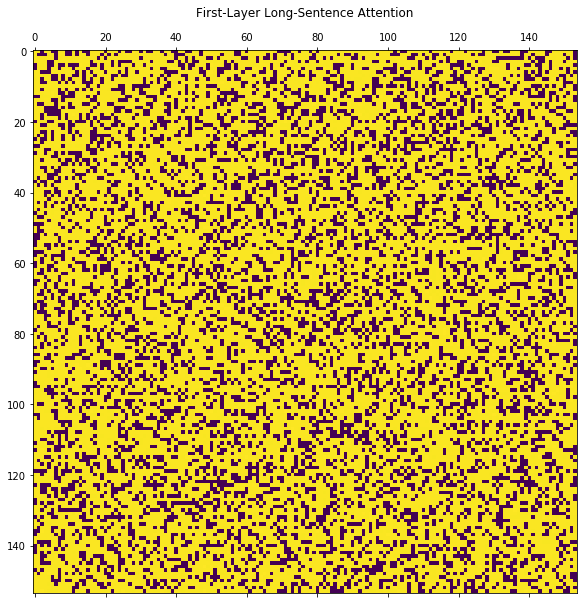

never even knew this movie existed until i found an old vhs copy of it hidden deep in my dusty horror closet . the title on the box said insect and the illustrations on the back made clear that it is just another insignificant and poorly produced s horror movie . they can surely be fun of course as long as do not expect an intelligent scenario and as long as you are not irritated by seeing a giant amount of cheesy make up effects . just about every important aspect that makes a horror movie worthy viewing is substandard here in blue monkey ! the plot is ridiculous and highly unoriginal the acting performances are painful to observe and there is a total lack of suspense . following the always popular trend of big bug movies blue monkey handles about a new and unknown insect species that wipes out the doctors


In [55]:
# Thanks to, 
# https://www.tensorflow.org/alpha/tutorials/text/nmt_with_attention
batch_index = 2
sentence = x[batch_index]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
attention = w.detach().numpy().squeeze()
attention = attention[batch_index] if type(batch_index) == int else attention
ax.matshow(attention, cmap='viridis')
fontdict = {'fontsize': 14}

# ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
# ax.set_yticklabels([''] + sentence, fontdict=fontdict)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_title("First-Layer Long-Sentence Attention")

plt.show()
print(' '.join(x[0]))

# Re-Structure DataFrame To Include Length 
Then train on only long-sequences of data for analysis of self-attention in length


In [4]:
train_df = pd.read_csv('test.csv')
train_df.sample(frac=1.).head()

,path,target,review_rating
19314,test/neg/9546_2.txt,0,2
889,test/neg/3518_3.txt,0,3
4240,test/neg/170_2.txt,0,2
11807,test/pos/6303_9.txt,1,9
9778,test/pos/5558_10.txt,1,10


In [5]:
lengths = []
for path in train_df['path'].values:
    file = open(str(base/path), encoding='utf-8').read()
    lengths.append(len(file.split(' ')))

In [6]:
train_df['file_length'] = lengths
train_df.head()

,path,target,review_rating,file_length
0,test/neg/4825_1.txt,0,1,140
1,test/pos/955_10.txt,1,10,161
2,test/pos/9036_8.txt,1,8,103
3,test/neg/1854_1.txt,0,1,167
4,test/pos/6740_10.txt,1,10,168


In [7]:
train_df.to_csv('test.csv', index=False)

In [125]:
pd.read_csv(io.StringIO(train_df.to_csv()), index_col=0).head()

,Unnamed: 0.1,path,target,review_rating,file_length
0,0,train/neg/1821_4.txt,0,4,41
1,1,train/neg/10402_1.txt,0,1,188
2,2,train/neg/1062_4.txt,0,4,122
3,3,train/neg/9056_1.txt,0,1,354
4,4,train/neg/5392_3.txt,0,3,794


In [149]:
len(train_df[train_df.file_length > 200])

10352

In [150]:
max(train_df.file_length.values)

2470

In [34]:
from train import load
from model import *

In [35]:
model, optim, lang = load('model_saves/' + 'e=5_itr=3_cancel_model.bin')

In [40]:
w = transformer_attention(model, x, lang, device)

td = pd.read_csv('test.csv')

In [8]:
td = pd.read_csv('test.csv')
td.head()

,path,target,review_rating,file_length
0,test/neg/4825_1.txt,0,1,140
1,test/pos/955_10.txt,1,10,161
2,test/pos/9036_8.txt,1,8,103
3,test/neg/1854_1.txt,0,1,167
4,test/pos/6740_10.txt,1,10,168


In [13]:
traindf = pd.read_csv('test.csv')

In [14]:
traindf = traindf[traindf.file_length > 200]

In [15]:
traindf.groupby('target').count()

,path,review_rating,file_length
target,,,
0,5114,5114,5114
1,4964,4964,4964


# Sentence Period Swapping 

In [9]:
traindf = pd.read_csv('train.csv')
lang = load_model()

In [26]:
# Sample Example from dataset
df = traindf[traindf.file_length < 25]
for sents, targets in batch_iter(lang, df, 3, shuffle=True):
    break

In [31]:
s = ' '.join(sents[2])

In [32]:
[sent.strip() for sent in s.split('.')]

['i would not rent this one even on dollar rental night', '']